## Drift-Diffusion Model

Reference: 

DDM tutorial from summerfield's lab
https://github.com/summerfieldlab/DriftDiffusion_Matlab

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from time import sleep

import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'
from IPython.display import clear_output

from utils.viz import viz 
viz.get_style()

### Brief introduction

The script implements the standard drift diffusion model (DDM), originally developped by Ratcliff in the 1970s in python. When modeling humans' behavioral data, we often either model the 

* **accuracy** 
* **reaction time** (RT)

DDM model is a tool to model the RT data. The standard DMM model only applies to the two-alternative forced choices (2AFC) task. 

In [6]:
class DDM:
    name = 'standard, DDM'

    def __init__(self, params):
        self._load_params(params)

    def _load_params(self, params):
        self.nu  = params[0] # drift rate mean, ν
        self.eta = params[1] # drift rate sd, η
        self.b   = params[2] # bound b
        self.z   = params[3] # prior z
        self.t0  = params[4] # non-decison time t0

    def decide(self, N, T, rng):
        '''Make a decision

        Args: 
            N: Total number of trials
            T: Terminated timesteps
        
        Outputs:
            RT:   reaction time
            act:  action (-1, 0, 1)
            traj: evidence trace
        '''
        # init storages
        RT   = np.zeros([N,]) + np.nan
        act  = np.zeros([N,])
        traj = np.zeros([N, T]) 

        DV = self.z * self.b
        for t in range(T):

            # δ = ν + ηε, ε ~ N(0, 1)
            delta = self.nu + self.eta*rng.randn(N)
            # add increment after nondecision time 
            DV += delta*(t-self.t0 >= 0)

            # collect data 
            RT[(DV > self.b) * (act==0)] = t
            RT[(DV < 0) * (act==0)] = t
            act[(DV > self.b) * (act==0)] = 1
            act[(DV < 0) * (act==0)] = -1
            traj[:, t] = DV
            traj[act==1, t] = self.b
            traj[act==-1, t] = 0

        traj -= self.b * .5
        return RT, act, traj

In [34]:
def plotDrift(RTs, acts, trajs, bound=250):
    '''Plot drift diffusion results

    Args:
        RTs: reaction time
        acts: decision 
        trajs: trajectories
    '''
    T = trajs.shape[1]
    fig = plt.figure(figsize=(10, 5))
    ax0 = plt.subplot2grid(shape=(4, 1), loc=(0, 0), rowspan=1)
    ax1 = plt.subplot2grid(shape=(4, 1), loc=(1, 0), rowspan=2)
    ax2 = plt.subplot2grid(shape=(4, 1), loc=(3, 0), rowspan=1)
    plt.subplots_adjust(hspace=.0)
    x1 = np.histogram(RTs[acts==1])[0]
    x2 = np.histogram(RTs[acts==-1])[0]
    xmax = np.max([x1, x2]) * 1.05
    ax = ax0
    sns.histplot(RTs[acts==1], kde=True, ax=ax)
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylim([0, xmax])
    ax = ax1
    for i in range(0, 10):
        sns.lineplot(x=np.arange(T), y=trajs[i, :], ax=ax)
    ax.axhline(y=0, xmin=0,xmax=T, ls='--', color='k', lw=1)
    ax.set_ylim([-bound, bound])
    ax = ax2
    sns.histplot(RTs[acts==-1], kde=True, ax=ax)
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_ylim([0, xmax])
    ax.invert_yaxis()

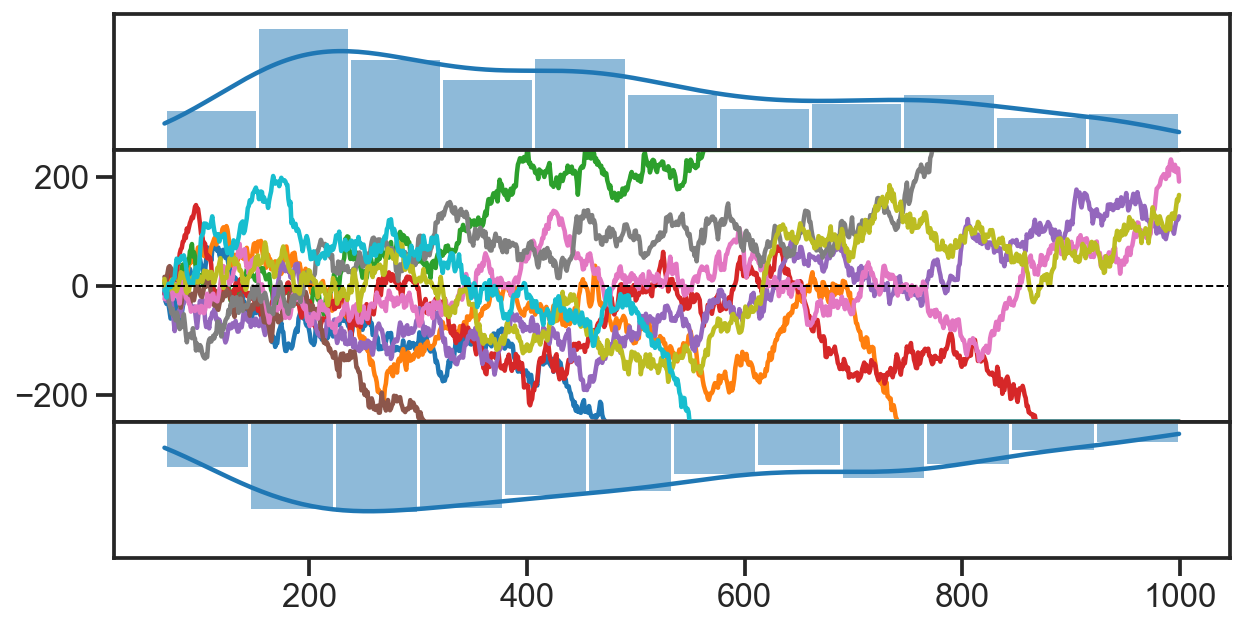

In [35]:
params = [0, 10, 500, .5, 0]
N, T = 2000, 1000 
model = DDM(params)
RTs, acts, trajs= model.decide(N, T, rng=np.random.RandomState(123))
plotDrift(RTs, acts, trajs)

### Change the drift rate

#### Drift rate = 1

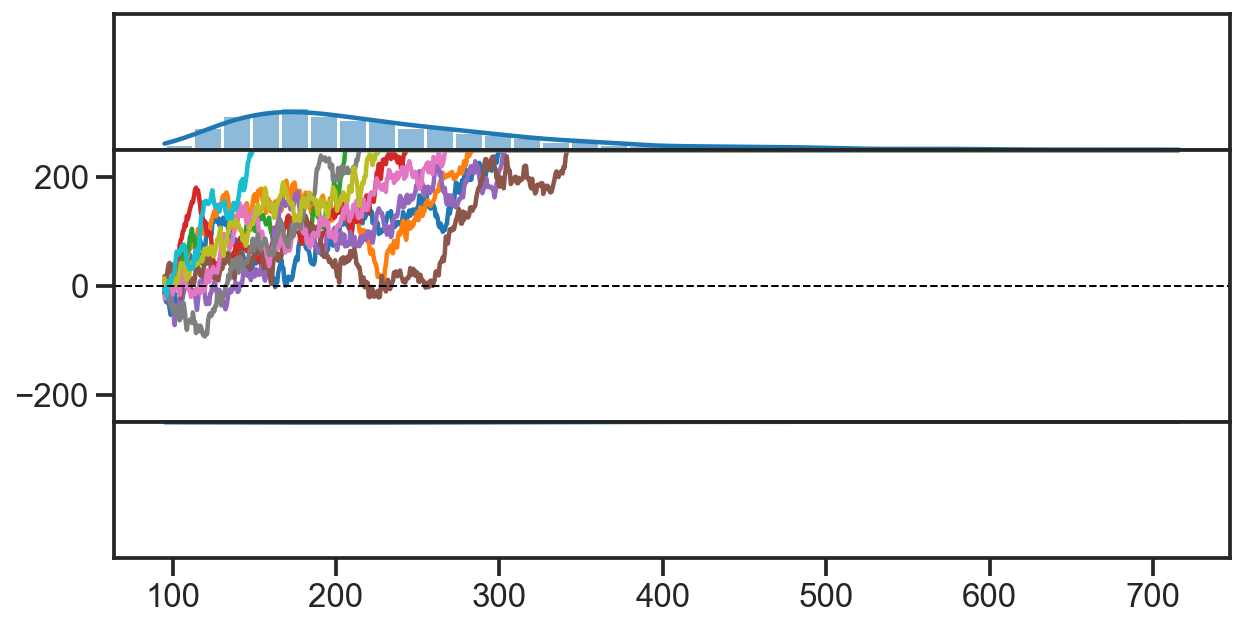

In [36]:
params = [1, 10, 500, .5, 0]
N, T = 2000, 1000 
model = DDM(params)
RTs, acts, trajs= model.decide(N, T, rng=np.random.RandomState(123))
plotDrift(RTs, acts, trajs)

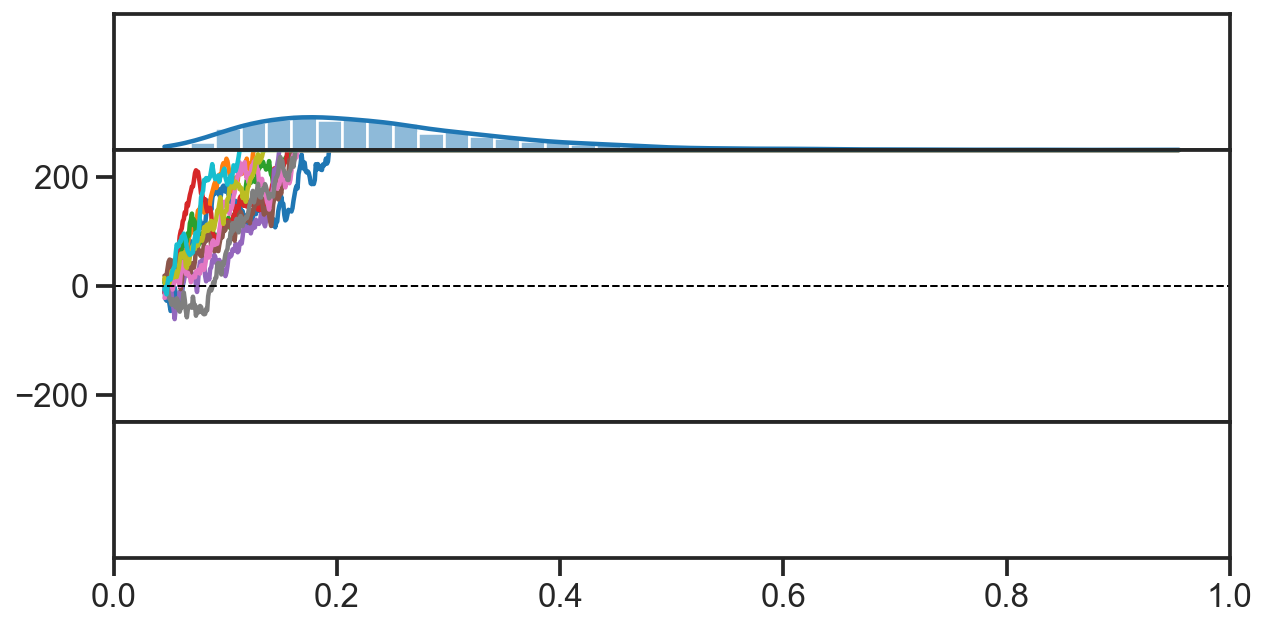

In [37]:
params = [2, 10, 500, .5, 0]
N, T = 2000, 1000 
model = DDM(params)
RTs, acts, trajs= model.decide(N, T, rng=np.random.RandomState(123))
plotDrift(RTs, acts, trajs)

#### Drift rate SD = 5

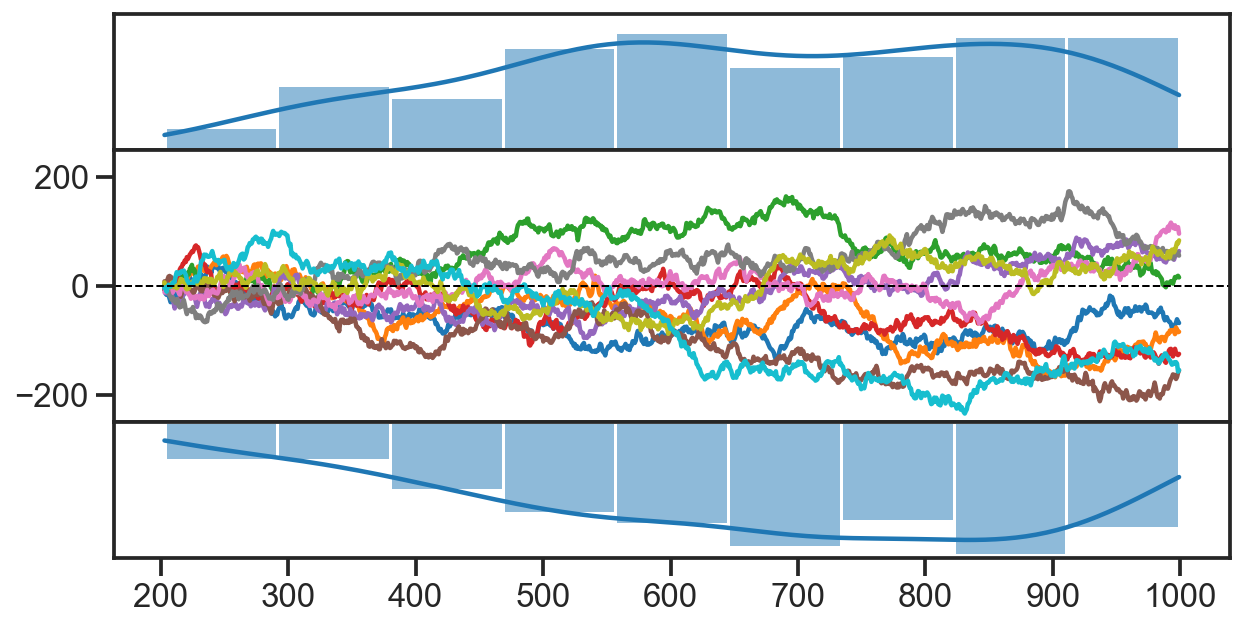

In [38]:
params = [0, 5, 500, .5, 0]
N, T = 2000, 1000 
model = DDM(params)
RTs, acts, trajs= model.decide(N, T, rng=np.random.RandomState(123))
plotDrift(RTs, acts, trajs)

#### Wider bound: b=600, 300

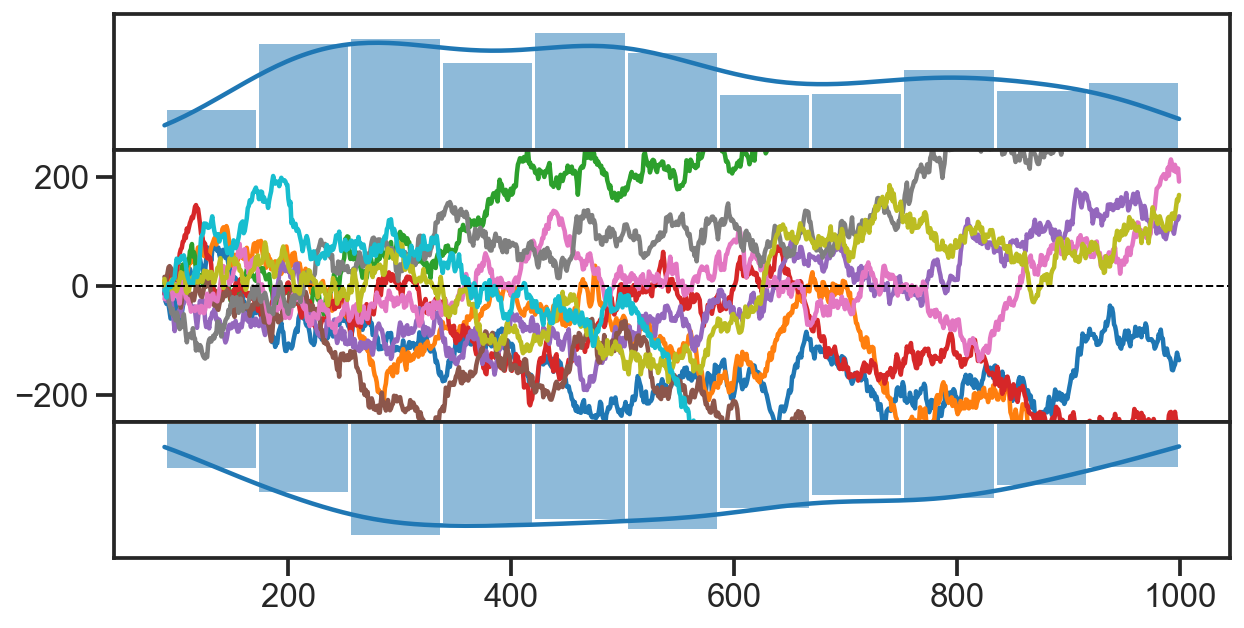

In [40]:
params = [0, 10, 600, .5, 0]
N, T = 2000, 1000 
model = DDM(params)
RTs, acts, trajs= model.decide(N, T, rng=np.random.RandomState(123))
plotDrift(RTs, acts, trajs)

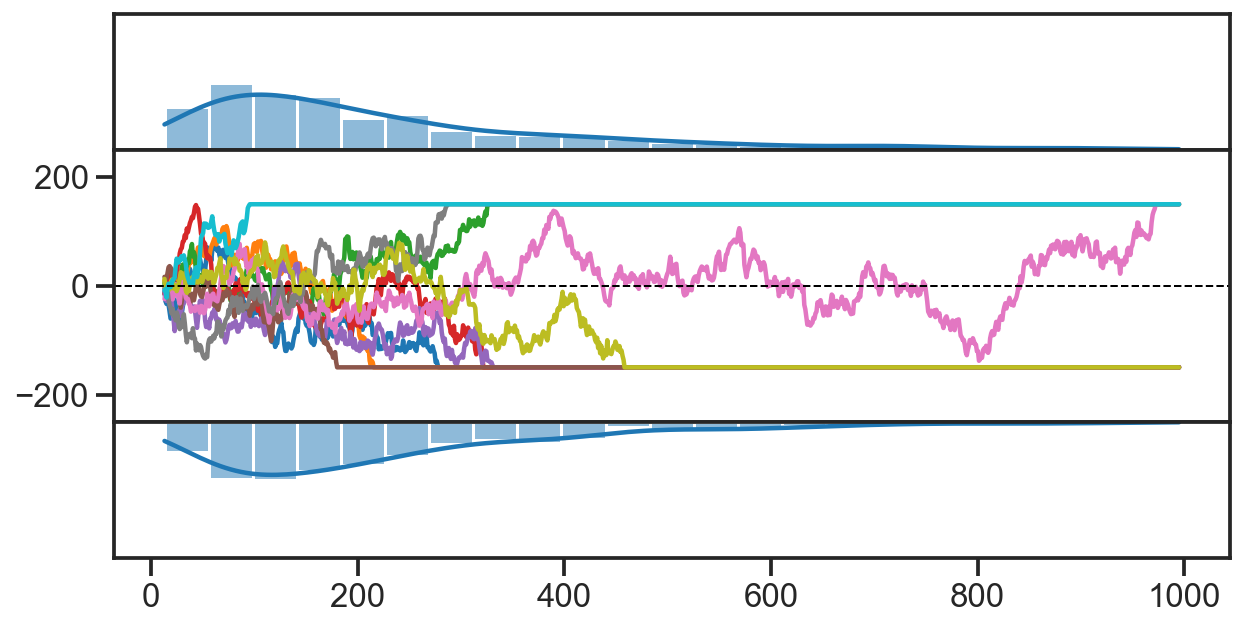

In [41]:
params = [0, 10, 300, .5, 0]
N, T = 2000, 1000 
model = DDM(params)
RTs, acts, trajs= model.decide(N, T, rng=np.random.RandomState(123))
plotDrift(RTs, acts, trajs)

#### Non-decision time z=200

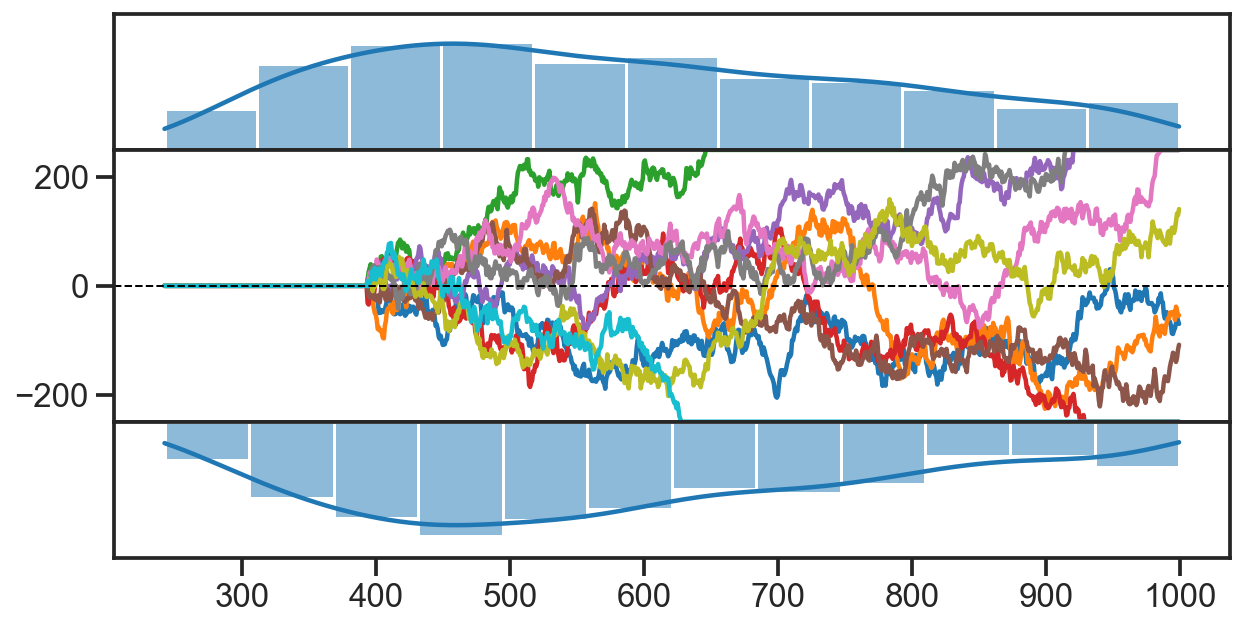

In [42]:
params = [0, 10, 500, .5, 200]
N, T = 2000, 1000 
model = DDM(params)
RTs, acts, trajs= model.decide(N, T, rng=np.random.RandomState(123))
plotDrift(RTs, acts, trajs)